# Coregionalised Kung Dataset

In this notebook we coregionalise Male and Female Kung (we assume that there are correlations in the heights of the two genders)

 NOT COREG
(100, 287)
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Stopped before convergence
(3.8846795501345945, 3.2552472614374586, array([[ 1.02600381]]), 1.0, 0.0)
0
[   0.    2.    4.    6.    8.   10.   12.   14.   16.   18.   20.   22.
   24.   26.   28.   30.   32.   34.   36.   38.   40.   42.   44.   46.
   48.   50.   52.   54.   56.   58.   60.   62.   64.   66.   68.   70.
   72.   74.   76.   78.   80.   82.   84.   86.   88.   90.   92.   94.
   96.   98.  100.  102.  104.  106.  108.  110.  112.  114.  116.  118.
  120.  122.  124.  126.  128.  130.  132.  134.  136.  138.  140.  142.
  144.  146.  148.  150.  152.  154.  156.  158.  160.  162.  164.  166.
  168.  170.  172.  174.  176.  178.  180.  182.  184.  186.  188.  190.
  192.  194.  196.  198.]
[0.0, 198.0]
COREG
(100, 544)
*
. . . . . . . . . . . . . . . 

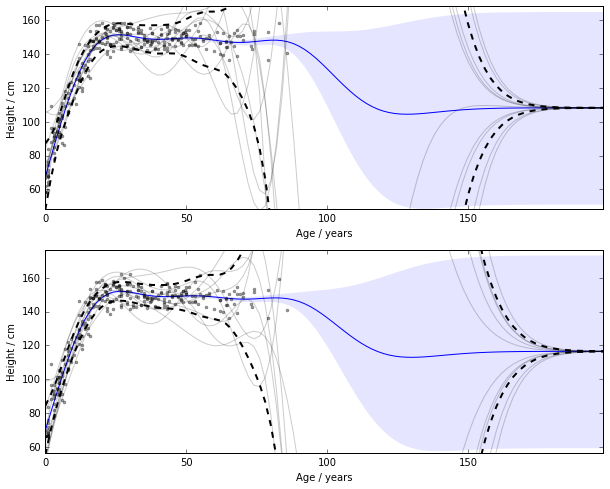

In [29]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()
sens = 100.0
epsilon = 1.0
delta = 0.01

plt.figure(figsize=[10,8])
for coreg in [0,1]:

    if coreg:
        print "COREG"
        X = kung[:,2:4]
        y = kung[:,0:1]
    else:
        print "NOT COREG"
        X = kung[kung[:,3]==0,2:3]
        y = kung[kung[:,3]==0,0:1]


    middley = (np.max(y)+np.min(y))/2
    y[y>middley+sens/2] = middley+sens/2
    y[y<middley-sens/2] = middley-sens/2

    #ysub = np.mean(y)
    ysub = (max(y)+min(y))/2.0
    y = y - ysub
    ys_std = np.std(y)
    y = y / ys_std
    ac_sens = sens/ys_std

    if coreg:
        kern = GPy.kern.RBF(1.0, lengthscale=25.0, variance=1.0)**GPy.kern.Coregionalize(1,output_dim=2, rank=1)
    else:
        kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)

    model = GPy.models.GPRegression(X,y,kern,normalizer=None)
    model.optimize()
    #model.Gaussian_noise = 0.3

    dpgp = dp4gp.DPGP_cloaking(model,ac_sens,epsilon,delta)
    Xtest = np.arange(-40,140,3)[:,None]
    plt.subplot(2,1,coreg+1)
    if coreg:
        dpgp.plot(plot_data = True,fixed_inputs=[(1,0)],extent_lower={0:0},extent_upper={0:200},Nits=100,ys_mean=ysub,ys_std=ys_std)
    else:
        dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:200},Nits=100,ys_mean=ysub,ys_std=ys_std)
    plt.ylim([middley-sens*0.6,middley+sens*0.6])
    plt.ylabel('Height / cm')
    plt.xlabel('Age / years')


In [30]:
kern.coregion.W

index,GP_regression.mul.coregion.W,constraints,priors
[0 0],3.11020113,,
[1 0],3.15413566,,


In [3]:
GPy.kern.Coregionalize?

In [ ]:
model.Gaussian_noise.variance.values[0] * ys_std

# Using standard method

4.38163537972
1.10816750703
One free dimension - 1d plot
Plotting mean (100)


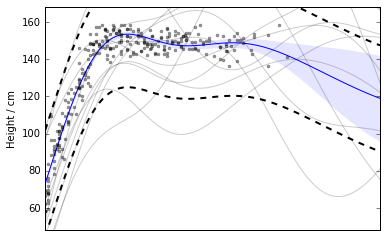

In [5]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()

X = kung[kung[:,3]==0,2:3]
y = kung[kung[:,3]==0,0:1]
sens = 100.0
epsilon = 50.0
delta = 0.01


middley = (np.max(y)+np.min(y))/2
y[y>middley+sens/2] = middley+sens/2
y[y<middley-sens/2] = middley-sens/2

#ysub = np.mean(y)
ysub = (max(y)+min(y))/2.0
y = y - ysub

ys_std = np.std(y)
y = y / ys_std
ac_sens = sens/ys_std

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
model = GPy.models.GPRegression(X,y,kern,normalizer=None)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_normal_prior(model,ac_sens,epsilon,delta)

plt.figure(figsize=[6,4])
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:120},ys_mean=ysub,ys_std=ys_std)
plt.ylim([middley-sens*0.6,middley+sens*0.6])

plt.ylabel('Height / cm')
#plt.xlabel('Age / years')
plt.xticks([],'')
plt.savefig('kung_standard.pdf')

# Using pseudo method

warning in stationary: failed to import cython module: falling back to numpy
0.677558298847
One free dimension - 1d plot
Plotting mean (100)


 dp4gp.py:131: RuntimeWarning:covariance is not positive-semidefinite.


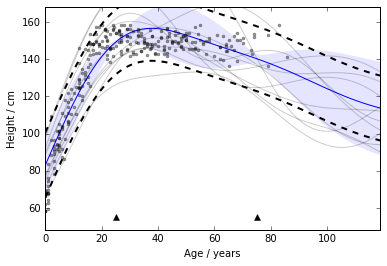

In [1]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()

X = kung[kung[:,3]==0,2:3]
y = kung[kung[:,3]==0,0:1]
sens = 100.0
epsilon = 50.0
delta = 0.01


middley = (np.max(y)+np.min(y))/2
y[y>middley+sens/2] = middley+sens/2
y[y<middley-sens/2] = middley-sens/2

#ysub = np.mean(y)
ysub = (max(y)+min(y))/2.0
y = y - ysub

ys_std = np.std(y)
y = y / ys_std
ac_sens = sens/ys_std

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
model = GPy.models.SparseGPRegression(X,y,kernel=kern,num_inducing=4)
model.inference_method = GPy.inference.latent_function_inference.FITC()
#model.set_Z(np.array([[-10,25,60,95]]).T)
#model.set_Z(np.array([[-15,25,65,105]]).T)
model.set_Z(np.array([[-25,25,75]]).T)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_pseudo_prior(model,ac_sens,epsilon,delta)

plt.figure(figsize=[6,4])
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:120},ys_mean=ysub,ys_std=ys_std)
plt.ylim([middley-sens*0.6,middley+sens*0.6])

plt.ylabel('Height / cm')
plt.xlabel('Age / years')
plt.plot([-25,25,75],[55,55,55],'^k')
plt.savefig('kung_pseudo.pdf')